<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para el periodo 202009 - 202012
 

In [147]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
data = pd.read_csv('/content/drive/My Drive/Dataset/BAJAS.txt',delimiter='~')
X  = data.iloc[:,:-1].values
Y  = data.iloc[:,3]
Y = Y[:,np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [168]:
c1,c2,c3,c4,c5,c6,c7 = [],[],[],[],[],[],[]

Anio= 2019
for ciclo in list(range(len(X[:,0]))):  
      if X[ciclo,2] == 1 and X[ciclo,0] == Anio:              
        c1.append(1)
      else:    
        c1.append(0) 
      if X[ciclo,2] == 2 and X[ciclo,0] == Anio:                
        c2.append(1)
      else:    
        c2.append(0) 
      if X[ciclo,2] == 3 and X[ciclo,0] == Anio:                
        c3.append(1)
      else:    
        c3.append(0) 
      if X[ciclo,2] == 4 and X[ciclo,0] == Anio:                
        c4.append(1)
      else:    
        c4.append(0)
      if X[ciclo,2] == 5 and X[ciclo,0] == Anio:                
        c5.append(1)
      else:    
        c5.append(0)
      if X[ciclo,2] == 6 and X[ciclo,0] == Anio:                
        c6.append(1)
      else:    
        c6.append(0)
      if X[ciclo,2] == 7 and X[ciclo,0] == Anio:                
        c7.append(1)
      else:    
        c7.append(0)

c1  = np.array(c1 )[:,np.newaxis]
c2  = np.array(c2 )[:,np.newaxis]
c3  = np.array(c3 )[:,np.newaxis]
c4  = np.array(c4 )[:,np.newaxis]
c5  = np.array(c5 )[:,np.newaxis]
c6  = np.array(c6 )[:,np.newaxis]
c7  = np.array(c7 )[:,np.newaxis]

In [186]:
X[ c1[:,0]==1,1]

array([ 2,  9,  4,  8, 10,  3, 12,  5,  1,  7, 11,  6])

In [177]:
len(x_mes[ c1[:,0]==1,0])

12

In [180]:
len(x_mes[ c1[:,0]==1,0])

12

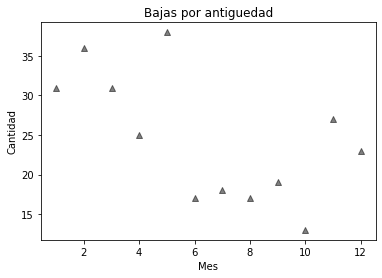

In [188]:
# Periodicidad
# 1 -> 1TRIM - Color: Negro
# 2 -> 2TRIM - Color: tomato
# 3 -> 3TRIM - Color: fuchsia
# 4 -> 4TRIM - Color: darkcyan 
# 5 -> 1-2 años - Color: Blue
# 6 -> 3-4 años - Color: purple 
# 7 -> Mayor/igual 5 años - Color: Green 

color_={0:"Black",1:"tomato",2:"fuchsia",3:"darkcyan",4:"Blue",5:"purple",6:"Green"}
fig, ax = plt.subplots()
for ciclo in list(range (2019,2021)):     
  if ciclo == 2019:  
    ax.scatter(
    X[ c1[:,0]==1,1],
    Y[ c1[:,0]==1,0],
    c= color_[0],
    marker = "^",
    label = ciclo,
    alpha=0.5) 
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas por antiguedad')
plt.show()


## Modelo SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR

In [ ]:
x  = x_mes[ c3[:,0]==1 , 0 ]
y  = Y [ c3[:,0]==1 , 0 ]
x  = x[:,np.newaxis]
y  = y[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=0)

In [ ]:
svr= SVR(kernel='rbf',degree=3, C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)

In [ ]:
y_predic = svr.predict(x_test)

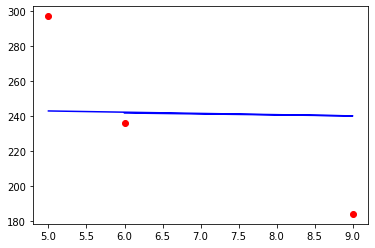

In [ ]:
plt.scatter(x_test,y_test, color='red')
plt.plot(x_test,y_predic, color='Blue' )
plt.show()

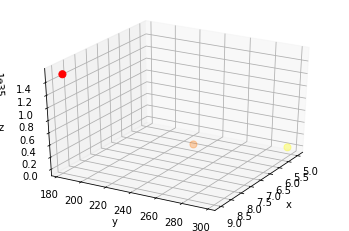

In [ ]:
r=np.exp(-(- x_test **2).sum(1))
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, x_test=x_test, y_test=y_test):
  ax= plt.subplot(projection='3d')
  ax.scatter3D(x_test,y_test,r,c=y_test,s=50,cmap='autumn')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
plot_3D()

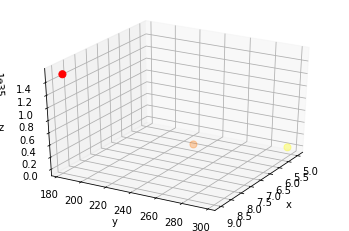

In [ ]:
r=np.exp(-(- x_test **2).sum(1))
from mpl_toolkits import mplot3d

color_={0:"Black",1:"tomato",2:"fuchsia",3:"darkcyan",4:"Blue",5:"purple",6:"Green"}

for ciclo in list(range (2019,2021)): 
  def plot_3D(elev=30, azim=30, x_test=x_test, y_predic=y_predic):
    ax= plt.subplot(projection='3d')
    if ciclo == 2019:        
        ax.scatter3D(x_test,y_test,r,c=y_test,s=50,cmap='autumn',marker = "^")
        ax.view_init(elev=elev, azim=azim)         
    else:     
        ax.scatter3D(x_test,y_test,r,c=y_test,s=50,cmap='autumn',marker = "o")
        ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')        
plot_3D()   

In [ ]:
#Precisión del modelo
print(svr.score(x_train,y_train))

-0.12107661163547778


In [ ]:
print(svr.score(x_test,y_test))

0.0458665612401169


In [ ]:
print(svr.score(x_test,y_predic))

1.0


In [ ]:
y_test

array([[297],
       [184],
       [236]])

In [ ]:
y_predic

In [ ]:
svr.support_vectors_

array([[ 3.],
       [ 8.],
       [ 7.],
       [ 2.],
       [ 1.],
       [12.],
       [10.],
       [11.]])